In [1]:
#!/usr/bin/env python3

import sys
import pandas as pd
import datetime
import requests
import numpy as np
from pandas import ExcelWriter
import os
import glob
import pytz
from dateutil.tz import gettz
import timeit
from time import sleep

# from datetime import datetime
from datetime import timedelta
import time
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 50000)

In [3]:
def read_data(devid, acc_token, address, start_time, end_time, descriptors):


    r2 = requests.get(
        url=address + "/api/plugins/telemetry/DEVICE/" + devid + "/values/timeseries?keys=" + descriptors + "&startTs=" + start_time + "&endTs=" + end_time + "&agg=NONE&limit=1000000",
        headers={'Content-Type': 'application/json', 'Accept': '*/*', 'X-Authorization': acc_token}).json()
    if r2:
        print('request completed')
        df = pd.DataFrame([])

        for desc in r2.keys():
            df1 = pd.DataFrame(r2[desc])
            df1.set_index('ts', inplace=True)
            df1.columns = [str(desc)]
            df = pd.concat([df, df1], axis=1)

        
        if df.empty == False:

            df.reset_index(drop=False, inplace=True)
            df = df.sort_values(by=['ts'])
            df.reset_index(drop=True, inplace=True)
            df.set_index('ts', inplace=True, drop=True)
            for col in df.columns:
                df[col] = df[col].astype('float')

            df = df.groupby(df.index).max()
            
        else:
            df = pd.DataFrame([])
    else:
        df = pd.DataFrame([])
#         print('Empty json!')
    return df

In [53]:
# download full house data
devid = '4353f360-98d6-11ea-8d54-4d0d5d00237b'
descriptors = 'pwrA,rpwrA'

start_time = [1598930422000]
end_time = [1598930428000]


address = "http://52.77.235.183:8080"

r = requests.post(address + "/api/auth/login",
                  json={'username': 'tenant@thingsboard.org', 'password': 'tenant'}).json()

# acc_token is the token to be used in the next request
acc_token = 'Bearer' + ' ' + r['token']



# if difference between end and start time is greater than 15 minutes, split data 


summary = read_data(devid, acc_token, address, str(start_time[0]), str(end_time[0]), descriptors)




request completed


In [54]:
summary['ts'] = pd.to_datetime(summary.index,utc=True, unit='ms')
summary['ts'] = summary['ts'].dt.tz_convert('Europe/Athens')

summary.set_index('ts',inplace=True, drop=True)
# summary = summary.resample('1S').mean()

summary

,pwrA,rpwrA
ts,,
2020-09-01 06:20:22.012000+03:00,117.5289,-5.2907
2020-09-01 06:20:22.032000+03:00,117.5949,-5.2920
2020-09-01 06:20:22.052000+03:00,117.6609,-5.4492
2020-09-01 06:20:22.072000+03:00,117.7600,-5.7612
2020-09-01 06:20:22.092000+03:00,117.8096,-5.4532
2020-09-01 06:20:22.112000+03:00,117.8426,-6.5457
2020-09-01 06:20:22.132000+03:00,117.8426,-5.9247
2020-09-01 06:20:22.152000+03:00,117.7930,-5.1467
2020-09-01 06:20:22.172000+03:00,117.7105,-5.3027


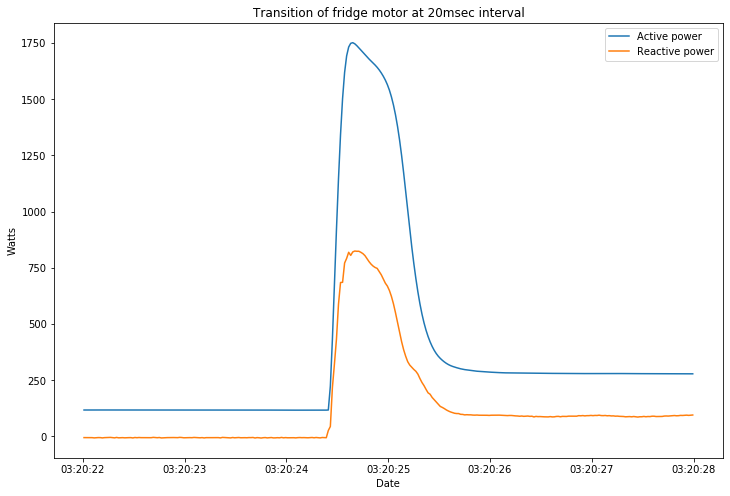

In [55]:
fig = plt.figure(figsize=[12,8])
plt.plot(summary['pwrA'])
plt.plot(summary['rpwrA'])
# plot = summary[['pwrA','rpwrA']].plot(figsize=[12,8])
plt.legend(['Active power','Reactive power'])
plt.title('Transition of fridge motor at 20msec interval')
plt.xlabel('Date')
plt.ylabel('Watts')
fig.savefig('fridge20msec.png')

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


[Text(0, 0.5, 'Watts'), Text(0.5, 0, 'Date')]

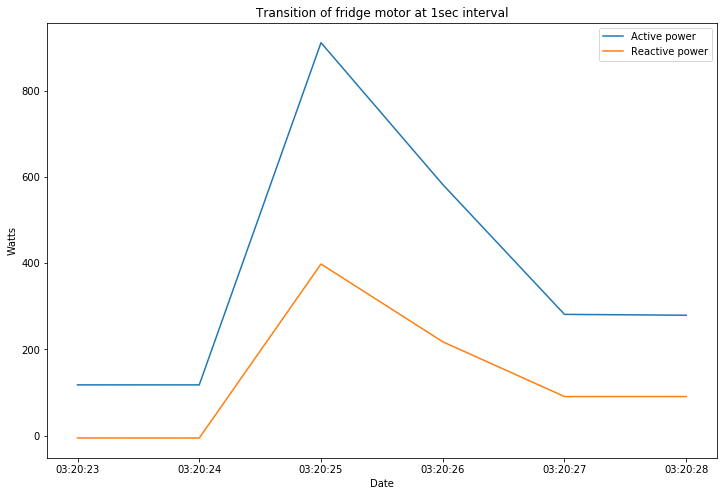

In [92]:
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%H:%M:%S')
df = summary.resample('1S',label='right').mean()
fig,ax = plt.subplots(figsize=[12,8])
ax.plot(df.index,df['pwrA'])
ax.plot(df.index,df['rpwrA'])
ax.legend(['Active power','Reactive power'])
ax.set_title('Transition of fridge motor at 1sec interval')
ax.xaxis.set_major_formatter(myFmt)
ax.set(xlabel='Date',ylabel='Watts')
# plt.xlabel('Date')
# plt.ylabel('Watts')
# fig.savefig('fridge1sec.png')

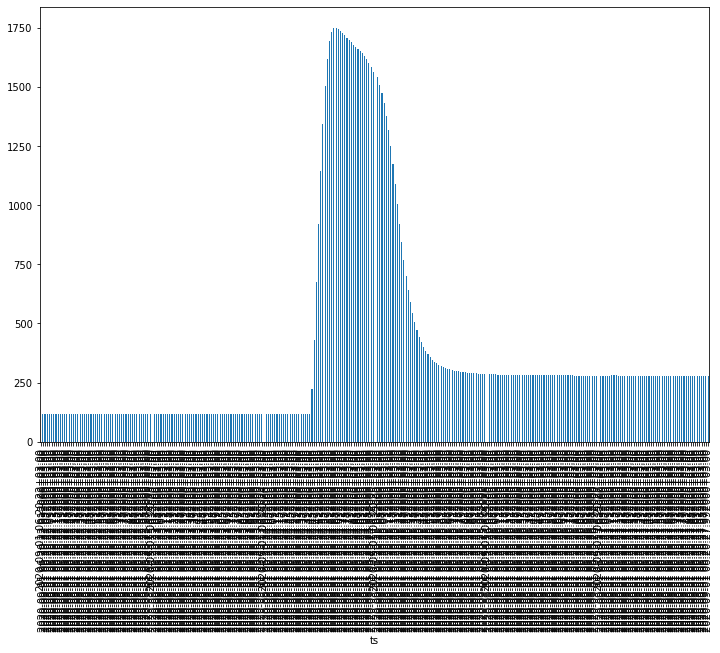

In [91]:
fig = plt.figure(figsize=[12,8])
tmp = pd.concat([summary,df],axis=1)
tmp.columns=['pwr20','rpwr20','pwr1','rpwr1']
# plt.plot(summary.index,summary['pwrA'],'c')
# plt.plot(summary.index,summary['rpwrA'])
tmp['pwr20'].plot(kind='bar')
# plt.legend(['Active power 20msec','Active power 1sec'])
# plt.title('Transition of fridge motor at 20msec VS 1sec interval')
# plt.xlabel('Date')
# plt.ylabel('Watts')
# fig.savefig('fridge20VS1.png')

Text(0, 0.5, 'Watts')

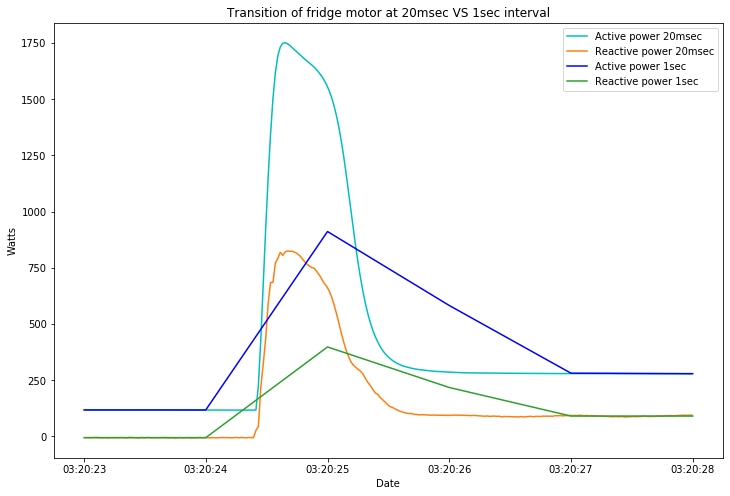

In [100]:
fig = plt.figure(figsize=[12,8])
plt.plot(summary['pwrA'].iloc[50:],'c')
plt.plot(summary['rpwrA'].iloc[50:],'tab:orange')
# plt.plot(summary.index,summary['rpwrA'])
plt.plot(df['pwrA'],'b')
plt.plot(df['rpwrA'],'tab:green')
plt.legend(['Active power 20msec','Reactive power 20msec','Active power 1sec','Reactive power 1sec'])
plt.title('Transition of fridge motor at 20msec VS 1sec interval')
plt.xlabel('Date')
plt.ylabel('Watts')
# fig.savefig('fridge20VS1_A_R.png')

In [98]:
summary.iloc[50:].head()

,pwrA,rpwrA
ts,,
2020-09-01 06:20:22.992000+03:00,117.9086,-6.0812
2020-09-01 06:20:23.012000+03:00,117.9747,-5.7715
2020-09-01 06:20:23.032000+03:00,118.0407,-5.4619
2020-09-01 06:20:23.052000+03:00,118.0572,-5.3081
2020-09-01 06:20:23.072000+03:00,118.0902,-5.6221
